In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset1.csv')
data2 = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset2.csv")
data3 = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset3.csv")

In [3]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_label = LabelEncoder()
data2.label= labelencoder_label.fit_transform(data2.label)
print(labelencoder_label.fit_transform(data2.label))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X1=data1.copy()
X2=data2.copy()
X3=data3.copy()

In [5]:
from sklearn import preprocessing
X1_scaled=preprocessing.scale(X1)
X2_scaled=preprocessing.scale(X2)
X3_scaled=preprocessing.scale(X3)

In [6]:
x1 = np.array(data1['x'])
y1 = np.array(data1['y'])
x2 = np.array(data2['x'])
y2 = np.array(data2['y'])
x3 = np.array(data3['x'])
y3 = np.array(data3['y'])

Text(0.5, 1.0, 'Dataset1')

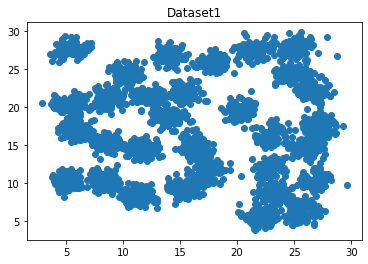

In [7]:
plt.scatter(x1 , y1)
plt.title("Dataset1")

Text(0.5, 1.0, 'Dataset2')

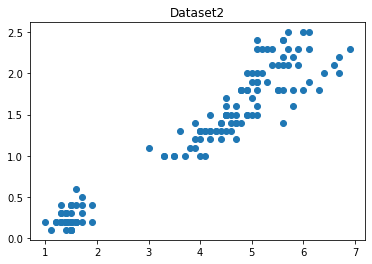

In [8]:
plt.scatter(x2 , y2)
plt.title("Dataset2")

Text(0.5, 1.0, 'Dataset3')

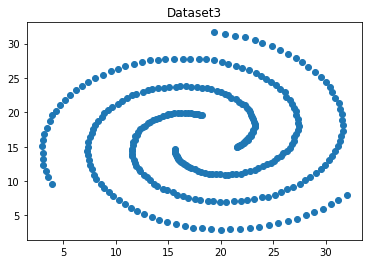

In [9]:
plt.scatter(x3 , y3)
plt.title("Dataset3")

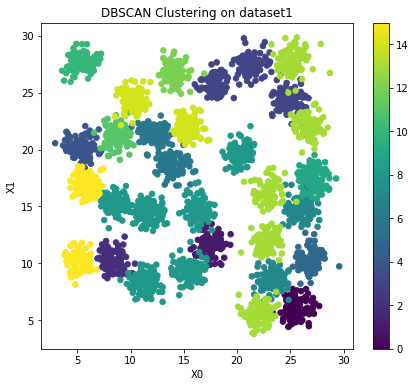

In [10]:
clt = DBSCAN(eps=0.6, min_samples=5)
model = clt.fit(X1_scaled)
clusters = pd.DataFrame(model.fit_predict(X1_scaled))
X1["Cluster"] = clusters
fig = plt.figure( figsize=(7,6)); ax = fig.add_subplot(111)
scatter = ax.scatter(x1,y1, c=X1["Cluster"],s=30)
ax.set_title("DBSCAN Clustering on dataset1")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

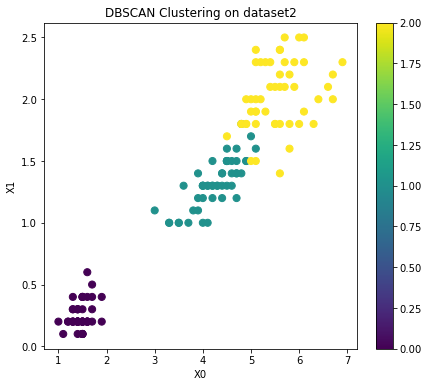

In [11]:
clt = DBSCAN()
model = clt.fit(X2_scaled)
clusters = pd.DataFrame(model.fit_predict(X2_scaled))
X2["Cluster"] = clusters
fig = plt.figure(figsize=(7,6)); ax = fig.add_subplot(111)
scatter = ax.scatter(x2,y2, c=X2["Cluster"],s=50)
ax.set_title("DBSCAN Clustering on dataset2")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

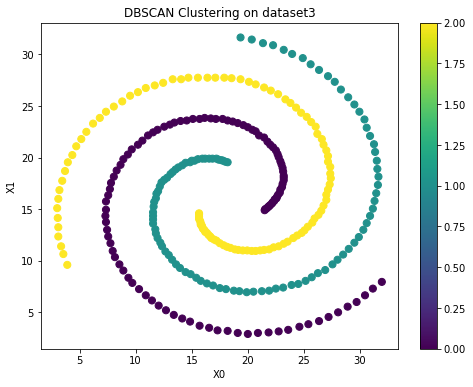

In [12]:
clt = DBSCAN()
model = clt.fit(X3_scaled)
clusters = pd.DataFrame(model.fit_predict(X3_scaled))
X3["Cluster"] = clusters
fig = plt.figure(figsize=(8,6)); ax = fig.add_subplot(111)
scatter = ax.scatter(x3,y3, c=X3["Cluster"],s=50)
ax.set_title("DBSCAN Clustering on dataset3")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [13]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [14]:
X1_df = data1.drop("label",axis = 1) #feature matrix
Y1_df = data1["label"] #Target vector
X1_df = np.array(X1_df)
Y1_df = np.array(Y1_df)

purity = 0

for k in range(1,10) :
    db=DBSCAN()
    pred_y = db.fit_predict(X1_scaled)
    purity = purity_score(Y1_df, pred_y)
    purity=+purity
print(purity)    

0.6774193548387096


In [15]:
X2_df = data2.drop("label",axis = 1) #feature matrix
Y2_df = data2["label"] #Target vector
X2_df = np.array(X2_df)
Y2_df = np.array(Y2_df)
purity = 0

for k in range(1,10) :
    db=DBSCAN()
    pred_y = db.fit_predict(X2_scaled)
    purity = purity_score(Y2_df, pred_y)
    purity=+purity
print(purity)    

1.0


In [16]:
X3_df = data3.drop("label",axis = 1) #feature matrix
Y3_df = data3["label"] #Target vector
X3_df = np.array(X3_df)
Y3_df = np.array(Y3_df)
purity = 0

for k in range(1,10) :
    db=DBSCAN()
    pred_y = db.fit_predict(X3_scaled)
    purity = purity_score(Y3_df, pred_y)
    purity=+purity
print(purity)  

1.0
